In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

In [2]:
print(os.getcwd())  # print current working directory

/content


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#Data Path
data_path = '/content/drive/MyDrive/AML-TASK1/'
test = pd.read_csv(data_path+'my_goodreads_test.csv')
train = pd.read_csv(data_path+'my_goodreads_train.csv')
submission = pd.read_csv(data_path + 'my_goodreads_sample_submission.csv')

In [5]:
train.head(10)

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,1da3dcc13cf360b9ecb06251e86237535,182091851,1c949b5dedf860514ec8b97ad158c9f4f,5,I thought this was a very good historical fant...,Fri Feb 01 16:44:16 -0800 2013,Tue Oct 25 18:49:25 -0700 2016,Sat May 04 00:00:00 -0700 2013,Thu Apr 25 00:00:00 -0700 2013,5,6
1,1ae436441b6153473ef907aed1006a159,1451461,112ee86a20d7e4308c0a054f8b03128cd,5,I've had this book recommended to me more than...,Sun Nov 08 12:10:16 -0800 2015,Sun Nov 08 12:24:59 -0800 2015,Tue May 05 00:00:00 -0700 2015,Sun May 03 00:00:00 -0700 2015,0,0
2,1aa5e9d859b0c0737f4b99a07edf19c88,13483572,1253729b67f301b75a0f26e85f6d6fb31,5,Seriously! You go and throw that twist into th...,Wed Oct 10 02:07:19 -0700 2012,Sat Apr 27 00:40:19 -0700 2013,Sat Apr 27 00:40:19 -0700 2013,Thu Apr 25 00:00:00 -0700 2013,0,0
3,1940c22aba67c3d49ccd37891c52c9f51,131585171,1ae0005e94dce0dc5c18d6ae2b4a329ab,4,Gosh!!! I'm still not recovering from the effi...,Thu Dec 05 00:45:29 -0800 2013,Thu Dec 05 00:50:17 -0800 2013,Thu Dec 05 00:50:17 -0800 2013,Wed Dec 04 00:00:00 -0800 2013,5,0
4,15e03534fccd0e7e1849d712ab9e44342,195643271,1d8357d2abdcc656635c5459c1feec761,3,"3.5 stars rounded down. I can't help it, I jus...",Wed Mar 15 18:08:14 -0700 2017,Wed Jul 05 12:55:32 -0700 2017,Wed Apr 12 12:17:07 -0700 2017,Tue Apr 11 00:00:00 -0700 2017,0,0
5,1b48efac31a7e138507bb2bd3b67699dd,1876765,1a1ef418b33c36bd5320f9b40168814f8,2,When I first read The Wasp Factory for a Scott...,Sun Sep 21 11:04:16 -0700 2014,Sun Sep 21 11:14:17 -0700 2014,Sun Sep 21 11:14:17 -0700 2014,Wed Sep 17 00:00:00 -0700 2014,0,0
6,16aa7dc30360af735246abd050c48d965,193148,1867a74731666f64d1dd989bc40ea2d60,3,Still an interesting series. Each story seems ...,Tue Jul 20 14:38:42 -0700 2010,Tue Sep 10 06:33:20 -0700 2013,Fri Mar 31 00:00:00 -0800 2006,Wed Mar 29 00:00:00 -0800 2006,0,0
7,1284ee7a064cbe87185ca819f9e304ab2,100833271,1e8560b7e97bbf63936113938b7ffc4ac,5,This was such an unexpected read for me. I nev...,Tue Sep 08 16:13:40 -0700 2015,Tue Sep 08 16:19:56 -0700 2015,Wed Sep 09 00:00:00 -0700 2015,NaN,0,0
8,137751140e478526c14f54489ad8ac8f5,133218621,10800c6611613342cb1d0bc21f9bcef27,1,DNF at 49% \n I don't quite know what I was ex...,Fri Jan 24 15:05:58 -0800 2014,Sat Mar 11 08:05:14 -0800 2017,Fri May 06 00:00:00 -0700 2016,Thu May 05 00:00:00 -0700 2016,0,0
9,1f9d9357bf073e39809b643aba7775914,135917531,1d7e482b97d3636fe0b9b8bb3065abf50,3,I learned something new today. \n It is possib...,Mon Apr 29 14:09:41 -0700 2013,Tue Jun 18 12:28:19 -0700 2013,Tue Apr 30 00:00:00 -0700 2013,NaN,45,15


In [6]:
train.columns

Index(['user_id', 'book_id', 'review_id', 'rating', 'review_text',
       'date_added', 'date_updated', 'read_at', 'started_at', 'n_votes',
       'n_comments'],
      dtype='object')

In [7]:
train.isnull().sum()

user_id              0
book_id              0
review_id            0
rating               0
review_text          0
date_added           0
date_updated         0
read_at          71412
started_at      213411
n_votes              0
n_comments           0
dtype: int64

In [8]:
train = train.dropna()
train.isnull().sum()

user_id         0
book_id         0
review_id       0
rating          0
review_text     0
date_added      0
date_updated    0
read_at         0
started_at      0
n_votes         0
n_comments      0
dtype: int64

In [9]:
train.dtypes


user_id         object
book_id          int64
review_id       object
rating           int64
review_text     object
date_added      object
date_updated    object
read_at         object
started_at      object
n_votes          int64
n_comments       int64
dtype: object

## **Text Preprocessing**

**1.Removing Punctuation**

In [10]:
# review_text column and rating column's amount of value except duplicates
train['review_text'].nunique(), train['rating'].nunique()

(474612, 5)

In [11]:
# review_text column's duplicates values drop
train.drop_duplicates(subset=['review_text'], inplace=True)
print('The amount of whole sample :',len(train))

The amount of whole sample : 474612


In [12]:
print(train.groupby('rating').size().reset_index(name = 'count'))

   rating   count
0       1   19369
1       2   37074
2       3  101197
3       4  171552
4       5  145420


In [13]:
train['review_text'] = train['review_text'].str.replace(r'[^a-zA-Z\s]','')
train[:10]

<ipython-input-13-400838f08790>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train['review_text'] = train['review_text'].str.replace(r'[^a-zA-Z\s]','')


,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,1da3dcc13cf360b9ecb06251e86237535,182091851,1c949b5dedf860514ec8b97ad158c9f4f,5,I thought this was a very good historical fant...,Fri Feb 01 16:44:16 -0800 2013,Tue Oct 25 18:49:25 -0700 2016,Sat May 04 00:00:00 -0700 2013,Thu Apr 25 00:00:00 -0700 2013,5,6
1,1ae436441b6153473ef907aed1006a159,1451461,112ee86a20d7e4308c0a054f8b03128cd,5,Ive had this book recommended to me more than ...,Sun Nov 08 12:10:16 -0800 2015,Sun Nov 08 12:24:59 -0800 2015,Tue May 05 00:00:00 -0700 2015,Sun May 03 00:00:00 -0700 2015,0,0
2,1aa5e9d859b0c0737f4b99a07edf19c88,13483572,1253729b67f301b75a0f26e85f6d6fb31,5,Seriously You go and throw that twist into the...,Wed Oct 10 02:07:19 -0700 2012,Sat Apr 27 00:40:19 -0700 2013,Sat Apr 27 00:40:19 -0700 2013,Thu Apr 25 00:00:00 -0700 2013,0,0
3,1940c22aba67c3d49ccd37891c52c9f51,131585171,1ae0005e94dce0dc5c18d6ae2b4a329ab,4,Gosh Im still not recovering from the effing C...,Thu Dec 05 00:45:29 -0800 2013,Thu Dec 05 00:50:17 -0800 2013,Thu Dec 05 00:50:17 -0800 2013,Wed Dec 04 00:00:00 -0800 2013,5,0
4,15e03534fccd0e7e1849d712ab9e44342,195643271,1d8357d2abdcc656635c5459c1feec761,3,stars rounded down I cant help it I just dont...,Wed Mar 15 18:08:14 -0700 2017,Wed Jul 05 12:55:32 -0700 2017,Wed Apr 12 12:17:07 -0700 2017,Tue Apr 11 00:00:00 -0700 2017,0,0
5,1b48efac31a7e138507bb2bd3b67699dd,1876765,1a1ef418b33c36bd5320f9b40168814f8,2,When I first read The Wasp Factory for a Scott...,Sun Sep 21 11:04:16 -0700 2014,Sun Sep 21 11:14:17 -0700 2014,Sun Sep 21 11:14:17 -0700 2014,Wed Sep 17 00:00:00 -0700 2014,0,0
6,16aa7dc30360af735246abd050c48d965,193148,1867a74731666f64d1dd989bc40ea2d60,3,Still an interesting series Each story seems t...,Tue Jul 20 14:38:42 -0700 2010,Tue Sep 10 06:33:20 -0700 2013,Fri Mar 31 00:00:00 -0800 2006,Wed Mar 29 00:00:00 -0800 2006,0,0
8,137751140e478526c14f54489ad8ac8f5,133218621,10800c6611613342cb1d0bc21f9bcef27,1,DNF at \n I dont quite know what I was expect...,Fri Jan 24 15:05:58 -0800 2014,Sat Mar 11 08:05:14 -0800 2017,Fri May 06 00:00:00 -0700 2016,Thu May 05 00:00:00 -0700 2016,0,0
10,1613a9d1eb81d54ff24669873df201084,15288601,1ff45f071d8d226e4a5d253107c1ec778,3,Really engaging and exciting endings So much s...,Sun May 18 10:20:51 -0700 2014,Thu Nov 12 06:01:33 -0800 2015,Tue Nov 10 00:00:00 -0800 2015,Tue Sep 22 00:00:00 -0700 2015,1,0
11,1329c62a08d87d56d67ce17c6aa906dca,194491822,1ed73a534cc7a98b35de46a0bb3d2185c,2,I did not find this book excellent or even lik...,Sat Apr 25 06:43:21 -0700 2015,Mon Aug 01 13:46:23 -0700 2016,Sun Feb 21 00:00:00 -0800 2016,Fri Feb 19 00:00:00 -0800 2016,0,0


In [14]:
train.tail(5)

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
699993,17fe9bcf3994bbd7e1365115d6a5e56ad,15002166,170940d2a1fa0afe5f020e7139e82a27e,4,This series is an interesting take on the clas...,Mon Oct 25 17:54:24 -0700 2010,Wed Nov 03 18:44:17 -0700 2010,Wed Nov 03 00:00:00 -0700 2010,Wed Nov 03 00:00:00 -0700 2010,0,0
699994,1c4d0befb5c0558f478be47e26ae055f9,171591592,19129b2bdaa6ed7f41b48318576b3469c,5,Review to follow when its closer to the releas...,Sun Oct 09 04:59:12 -0700 2016,Mon Oct 10 06:40:56 -0700 2016,Mon Oct 10 08:50:43 -0700 2016,Sun Oct 09 00:00:00 -0700 2016,3,0
699996,1eeee696a17b2113a5733f5bc1361717d,18920506,1496c6c752fa2cd723e911edfe0a06d89,5,I absolutely hate cliffhangers \n Dreamfever s...,Fri Jan 28 08:34:08 -0800 2011,Wed Apr 06 07:00:15 -0700 2011,Wed Apr 06 00:00:00 -0700 2011,Tue Apr 05 00:00:00 -0700 2011,0,0
699998,14761ca19cf5e6ec4d6cea2e9bdae8eed,163023491,1ea2879877be71e442ad3ee6d98fbe48a,4,spoiler alert \n \n Predictable \n Im reall...,Wed Jan 01 20:40:03 -0800 2014,Wed Feb 04 14:20:55 -0800 2015,Wed Jul 30 00:00:00 -0700 2014,Tue Jul 29 00:00:00 -0700 2014,0,0
699999,1cf32f3e040dc59913c44a5f14780e9d5,11759699,125d4428c76ff4ebf12ef7c055603d1bd,5,What a fantastic novel I am not a gamer the on...,Tue Sep 06 12:17:30 -0700 2011,Sat Sep 10 17:42:22 -0700 2011,Sat Sep 10 00:00:00 -0700 2011,Tue Sep 06 00:00:00 -0700 2011,1,0


In [15]:
train['review_text'] = train['review_text'].str.replace(r'\n','')
train[:10]

<ipython-input-15-692cce31976c>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train['review_text'] = train['review_text'].str.replace(r'\n','')


,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,1da3dcc13cf360b9ecb06251e86237535,182091851,1c949b5dedf860514ec8b97ad158c9f4f,5,I thought this was a very good historical fant...,Fri Feb 01 16:44:16 -0800 2013,Tue Oct 25 18:49:25 -0700 2016,Sat May 04 00:00:00 -0700 2013,Thu Apr 25 00:00:00 -0700 2013,5,6
1,1ae436441b6153473ef907aed1006a159,1451461,112ee86a20d7e4308c0a054f8b03128cd,5,Ive had this book recommended to me more than ...,Sun Nov 08 12:10:16 -0800 2015,Sun Nov 08 12:24:59 -0800 2015,Tue May 05 00:00:00 -0700 2015,Sun May 03 00:00:00 -0700 2015,0,0
2,1aa5e9d859b0c0737f4b99a07edf19c88,13483572,1253729b67f301b75a0f26e85f6d6fb31,5,Seriously You go and throw that twist into the...,Wed Oct 10 02:07:19 -0700 2012,Sat Apr 27 00:40:19 -0700 2013,Sat Apr 27 00:40:19 -0700 2013,Thu Apr 25 00:00:00 -0700 2013,0,0
3,1940c22aba67c3d49ccd37891c52c9f51,131585171,1ae0005e94dce0dc5c18d6ae2b4a329ab,4,Gosh Im still not recovering from the effing C...,Thu Dec 05 00:45:29 -0800 2013,Thu Dec 05 00:50:17 -0800 2013,Thu Dec 05 00:50:17 -0800 2013,Wed Dec 04 00:00:00 -0800 2013,5,0
4,15e03534fccd0e7e1849d712ab9e44342,195643271,1d8357d2abdcc656635c5459c1feec761,3,stars rounded down I cant help it I just dont...,Wed Mar 15 18:08:14 -0700 2017,Wed Jul 05 12:55:32 -0700 2017,Wed Apr 12 12:17:07 -0700 2017,Tue Apr 11 00:00:00 -0700 2017,0,0
5,1b48efac31a7e138507bb2bd3b67699dd,1876765,1a1ef418b33c36bd5320f9b40168814f8,2,When I first read The Wasp Factory for a Scott...,Sun Sep 21 11:04:16 -0700 2014,Sun Sep 21 11:14:17 -0700 2014,Sun Sep 21 11:14:17 -0700 2014,Wed Sep 17 00:00:00 -0700 2014,0,0
6,16aa7dc30360af735246abd050c48d965,193148,1867a74731666f64d1dd989bc40ea2d60,3,Still an interesting series Each story seems t...,Tue Jul 20 14:38:42 -0700 2010,Tue Sep 10 06:33:20 -0700 2013,Fri Mar 31 00:00:00 -0800 2006,Wed Mar 29 00:00:00 -0800 2006,0,0
8,137751140e478526c14f54489ad8ac8f5,133218621,10800c6611613342cb1d0bc21f9bcef27,1,DNF at I dont quite know what I was expectin...,Fri Jan 24 15:05:58 -0800 2014,Sat Mar 11 08:05:14 -0800 2017,Fri May 06 00:00:00 -0700 2016,Thu May 05 00:00:00 -0700 2016,0,0
10,1613a9d1eb81d54ff24669873df201084,15288601,1ff45f071d8d226e4a5d253107c1ec778,3,Really engaging and exciting endings So much s...,Sun May 18 10:20:51 -0700 2014,Thu Nov 12 06:01:33 -0800 2015,Tue Nov 10 00:00:00 -0800 2015,Tue Sep 22 00:00:00 -0700 2015,1,0
11,1329c62a08d87d56d67ce17c6aa906dca,194491822,1ed73a534cc7a98b35de46a0bb3d2185c,2,I did not find this book excellent or even lik...,Sat Apr 25 06:43:21 -0700 2015,Mon Aug 01 13:46:23 -0700 2016,Sun Feb 21 00:00:00 -0800 2016,Fri Feb 19 00:00:00 -0800 2016,0,0


Now I removed all the punctuation marks, and it is time to do the tokenization

**Tokenization & Removing Stopwords**

In [16]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

# Get the list of English stopwords from NLTK
stop_words = stopwords.words('english')

# Create a CountVectorizer object with stopwords
vectorizer = CountVectorizer(stop_words=stop_words)

# Fit the vectorizer on the text data
#vectorizer.fit(train['review_text'])

**Checking and Removal Common words and rare words**

In [18]:
#checking common words
from collections import Counter
cnt = Counter()
for text in train["review_text"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('the', 4114225),
 ('and', 2957405),
 ('I', 2908545),
 ('to', 2515521),
 ('a', 2313073),
 ('of', 2067660),
 ('is', 1332526),
 ('that', 1329199),
 ('was', 1327832),
 ('in', 1281593)]

In [19]:

FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

train["review_text"] = train["review_text"].apply(lambda text: remove_freqwords(text))
train.head()

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,1da3dcc13cf360b9ecb06251e86237535,182091851,1c949b5dedf860514ec8b97ad158c9f4f,5,thought this very good historical fantasy set ...,Fri Feb 01 16:44:16 -0800 2013,Tue Oct 25 18:49:25 -0700 2016,Sat May 04 00:00:00 -0700 2013,Thu Apr 25 00:00:00 -0700 2013,5,6
1,1ae436441b6153473ef907aed1006a159,1451461,112ee86a20d7e4308c0a054f8b03128cd,5,Ive had this book recommended me more than onc...,Sun Nov 08 12:10:16 -0800 2015,Sun Nov 08 12:24:59 -0800 2015,Tue May 05 00:00:00 -0700 2015,Sun May 03 00:00:00 -0700 2015,0,0
2,1aa5e9d859b0c0737f4b99a07edf19c88,13483572,1253729b67f301b75a0f26e85f6d6fb31,5,Seriously You go throw twist into story This w...,Wed Oct 10 02:07:19 -0700 2012,Sat Apr 27 00:40:19 -0700 2013,Sat Apr 27 00:40:19 -0700 2013,Thu Apr 25 00:00:00 -0700 2013,0,0
3,1940c22aba67c3d49ccd37891c52c9f51,131585171,1ae0005e94dce0dc5c18d6ae2b4a329ab,4,Gosh Im still not recovering from effing CLIFF...,Thu Dec 05 00:45:29 -0800 2013,Thu Dec 05 00:50:17 -0800 2013,Thu Dec 05 00:50:17 -0800 2013,Wed Dec 04 00:00:00 -0800 2013,5,0
4,15e03534fccd0e7e1849d712ab9e44342,195643271,1d8357d2abdcc656635c5459c1feec761,3,stars rounded down cant help it just dont conn...,Wed Mar 15 18:08:14 -0700 2017,Wed Jul 05 12:55:32 -0700 2017,Wed Apr 12 12:17:07 -0700 2017,Tue Apr 11 00:00:00 -0700 2017,0,0


In [20]:
#Removing Rare words

n_rare_words = 10
RAREWORDS = set([w for (w, wc) in cnt.most_common()[:-n_rare_words-1:-1]])
def remove_rarewords(text):
    """custom function to remove the rare words"""
    return " ".join([word for word in str(text).split() if word not in RAREWORDS])

train["review_text"] = train["review_text"].apply(lambda text: remove_rarewords(text))
train.head()

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,1da3dcc13cf360b9ecb06251e86237535,182091851,1c949b5dedf860514ec8b97ad158c9f4f,5,thought this very good historical fantasy set ...,Fri Feb 01 16:44:16 -0800 2013,Tue Oct 25 18:49:25 -0700 2016,Sat May 04 00:00:00 -0700 2013,Thu Apr 25 00:00:00 -0700 2013,5,6
1,1ae436441b6153473ef907aed1006a159,1451461,112ee86a20d7e4308c0a054f8b03128cd,5,Ive had this book recommended me more than onc...,Sun Nov 08 12:10:16 -0800 2015,Sun Nov 08 12:24:59 -0800 2015,Tue May 05 00:00:00 -0700 2015,Sun May 03 00:00:00 -0700 2015,0,0
2,1aa5e9d859b0c0737f4b99a07edf19c88,13483572,1253729b67f301b75a0f26e85f6d6fb31,5,Seriously You go throw twist into story This w...,Wed Oct 10 02:07:19 -0700 2012,Sat Apr 27 00:40:19 -0700 2013,Sat Apr 27 00:40:19 -0700 2013,Thu Apr 25 00:00:00 -0700 2013,0,0
3,1940c22aba67c3d49ccd37891c52c9f51,131585171,1ae0005e94dce0dc5c18d6ae2b4a329ab,4,Gosh Im still not recovering from effing CLIFF...,Thu Dec 05 00:45:29 -0800 2013,Thu Dec 05 00:50:17 -0800 2013,Thu Dec 05 00:50:17 -0800 2013,Wed Dec 04 00:00:00 -0800 2013,5,0
4,15e03534fccd0e7e1849d712ab9e44342,195643271,1d8357d2abdcc656635c5459c1feec761,3,stars rounded down cant help it just dont conn...,Wed Mar 15 18:08:14 -0700 2017,Wed Jul 05 12:55:32 -0700 2017,Wed Apr 12 12:17:07 -0700 2017,Tue Apr 11 00:00:00 -0700 2017,0,0


For the last step there can be stemming or lemmatization.
I choose the Stemming in this case

In [21]:
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

train["review_text"] = train["review_text"].apply(lambda text: stem_words(text))
train.head()

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,1da3dcc13cf360b9ecb06251e86237535,182091851,1c949b5dedf860514ec8b97ad158c9f4f,5,thought thi veri good histor fantasi set new y...,Fri Feb 01 16:44:16 -0800 2013,Tue Oct 25 18:49:25 -0700 2016,Sat May 04 00:00:00 -0700 2013,Thu Apr 25 00:00:00 -0700 2013,5,6
1,1ae436441b6153473ef907aed1006a159,1451461,112ee86a20d7e4308c0a054f8b03128cd,5,ive had thi book recommend me more than onc so...,Sun Nov 08 12:10:16 -0800 2015,Sun Nov 08 12:24:59 -0800 2015,Tue May 05 00:00:00 -0700 2015,Sun May 03 00:00:00 -0700 2015,0,0
2,1aa5e9d859b0c0737f4b99a07edf19c88,13483572,1253729b67f301b75a0f26e85f6d6fb31,5,serious you go throw twist into stori thi what...,Wed Oct 10 02:07:19 -0700 2012,Sat Apr 27 00:40:19 -0700 2013,Sat Apr 27 00:40:19 -0700 2013,Thu Apr 25 00:00:00 -0700 2013,0,0
3,1940c22aba67c3d49ccd37891c52c9f51,131585171,1ae0005e94dce0dc5c18d6ae2b4a329ab,4,gosh im still not recov from ef cliffhang thi ...,Thu Dec 05 00:45:29 -0800 2013,Thu Dec 05 00:50:17 -0800 2013,Thu Dec 05 00:50:17 -0800 2013,Wed Dec 04 00:00:00 -0800 2013,5,0
4,15e03534fccd0e7e1849d712ab9e44342,195643271,1d8357d2abdcc656635c5459c1feec761,3,star round down cant help it just dont connect...,Wed Mar 15 18:08:14 -0700 2017,Wed Jul 05 12:55:32 -0700 2017,Wed Apr 12 12:17:07 -0700 2017,Tue Apr 11 00:00:00 -0700 2017,0,0


Now stemming is also done, so it can be possible to perform Vectorization and then,there will be an attempt to build a baseline machine learning model

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
# Create a CountVectorizer object
#vectorizer = CountVectorizer()

# Split the data into training and testing and Valid sets
#X_train, X_val, y_train, y_val = train_test_split(train['review_text'], train['rating'], test_size=0.2, random_state=42)
#X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)

# Create a CountVectorizer object with stopwords
#vectorizer = CountVectorizer(stop_words=stop_words)
#vectorizer = CountVectorizer(max_df = 0.5, max_features=50000)

# Fit the vectorizer on the training data
#vectorizer.fit(X_train)

# Transform the training and testing data into bag-of-words matrices
# X_train = vectorizer.transform(X_train)
#X_test = vectorizer.transform(X_test)

**Preparation for Base ML models and DNN**

In [24]:
X = train['review_text']
y = train['rating']
# Create a CountVectorizer object
vectorizer = CountVectorizer()

# Split the data into training and testing and Valid sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)

# Create a CountVectorizer object with stopwords
#vectorizer = CountVectorizer(stop_words=stop_words)
vectorizer = CountVectorizer(max_df = 0.5, max_features=50000)
# Fit the vectorizer on the training data
vectorizer.fit(X_train)

# Transform the training and testing data into bag-of-words matrices
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)
X_val = vectorizer.transform(X_val)

In [25]:
# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(train['review_text'], train['rating'], test_size=0.2, random_state=42)

# Create a CountVectorizer object
#vectorizer = CountVectorizer(stop_words='english')

# Fit the vectorizer on the text data
#vectorizer.fit(X_train)

# Transform the text data into a bag-of-words matrix
#X_train = vectorizer.transform(X_train)
#X_test = vectorizer.transform(X_test)

In [26]:
print("X_train ",X_train.shape)
print("y_train ",y_train.shape)
print("X_test ",X_test.shape )
print("y_test ",y_test.shape )
print("X_val ",X_val.shape )
print("y_val ",y_val.shape )

X_train  (379689, 50000)
y_train  (379689,)
X_test  (47462, 50000)
y_test  (47462,)
X_val  (47461, 50000)
y_val  (47461,)


In [27]:
print(X_train[0])

  (0, 1788)	1
  (0, 2817)	1
  (0, 3716)	1
  (0, 3759)	1
  (0, 4055)	1
  (0, 4092)	1
  (0, 5507)	1
  (0, 6212)	1
  (0, 8702)	1
  (0, 10069)	1
  (0, 10997)	1
  (0, 11517)	1
  (0, 11528)	1
  (0, 12273)	1
  (0, 13184)	1
  (0, 15893)	2
  (0, 17269)	1
  (0, 17992)	2
  (0, 18370)	1
  (0, 18696)	1
  (0, 19206)	2
  (0, 19347)	2
  (0, 20553)	1
  (0, 21383)	1
  (0, 21404)	1
  (0, 23549)	1
  (0, 25392)	1
  (0, 25457)	3
  (0, 28913)	1
  (0, 30718)	1
  (0, 32365)	1
  (0, 35224)	1
  (0, 37481)	1
  (0, 37945)	1
  (0, 38401)	1
  (0, 38448)	1
  (0, 38539)	1
  (0, 38751)	2
  (0, 42079)	1
  (0, 43638)	1
  (0, 44194)	1
  (0, 44647)	1
  (0, 45402)	1
  (0, 47815)	1
  (0, 48105)	1
  (0, 48273)	1
  (0, 48294)	1
  (0, 48568)	2


In [28]:
%matplotlib inline
from matplotlib import style
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [29]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("test accuracy is: {:.2f}%".format(logreg_acc*100))

test accuracy is: 53.36%


# **Neural Network**

In [30]:
from sklearn.linear_model import Perceptron
import tensorflow as tf
%tensorflow_version 2.x
from tensorflow import keras
print(tf.__version__)
print(keras.__version__)
from  keras.utils import plot_model

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

print("The GPU device you are using is:", tf.test.gpu_device_name())

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.12.0
2.12.0
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12196717438726443507
xla_global_id: -1
]
The GPU device you are using is: 


In [48]:
from keras import models
from keras.layers import Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences # Keras preprocessing tool for padding
from tensorflow.keras.models import Sequential # Connecting the Layer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten,Embedding # Set Layer,1-dimensionize, word2vect

In [ ]:
#base_model = keras.models.Sequential([
#    keras.layers.Flatten(input_shape=[28, 28]),
#    keras.layers.Dense(300, activation="relu"),
#    keras.layers.Dense(10, activation="softmax")
#])

In [ ]:
#vocab_size = len(vectorizer.vocabulary_)
#from keras.models import Sequential
#from keras.layers import Embedding, LSTM, Dense

#base_model = Sequential()
#base_model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_seq_length))
#base_model.add(LSTM(units=64))
#base_model.add(Dense(units=1, activation='sigmoid'))

#base_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
#model = models.Sequential()
#model.add( Dense(16, activation="relu", input_shape = (X_train.shape[1],) ) )
#model.add( Dense(16, activation="relu") )
#model.add( Dense(1, activation="sigmoid"))

In [ ]:
#model.summary()

In [57]:
base_model = Sequential([
          Dense(16, activation='relu', input_shape=(50000,)),
          Dense(6, activation='softmax')
    ])

In [58]:
base_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                800016    
                                                                 
 dense_7 (Dense)             (None, 6)                 102       
                                                                 
Total params: 800,118
Trainable params: 800,118
Non-trainable params: 0
_________________________________________________________________


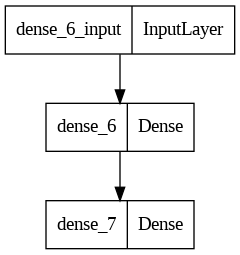

In [59]:
plot_model(base_model)

In [60]:
base_model.compile(loss = 'categorical_crossentropy',optimizer = Adam(learning_rate=0.001),metrics = ['accuracy'])
base_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                800016    
                                                                 
 dense_7 (Dense)             (None, 6)                 102       
                                                                 
Total params: 800,118
Trainable params: 800,118
Non-trainable params: 0
_________________________________________________________________


In [47]:
#model.compile(loss = 'categorical_crossentropy',optimizer = adam(learning_rate=0.001),metrics = ['accuracy'])
#model.summary()

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Creates 'EarlyStopping' callback
earlystopping_cb = EarlyStopping(patience=4, restore_best_weights=True)


In [ ]:
#Fit the model
#hist = base_model.fit(X_train, y_train, epochs=5, batch_size=128, validation_data=(X_val, y_val), verbose=1)
#hist = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))
#history = model.fit(X_train,y_train,validation_data=(X_val, y_val),callbacks=[earlystopping_cb],batch_size=64,epochs=5,verbose=1,)

In [ ]:
mode.summary

In [54]:
from keras.utils import to_categorical

y_train_one_hot = to_categorical(y_train, num_classes = 6)
y_val_one_hot = to_categorical(y_val, num_classes = 6)

In [55]:
y_test_one_hot = to_categorical(y_test, num_classes=6)

In [61]:
history = base_model.fit(X_train, y_train_one_hot, validation_data=(X_val, y_val_one_hot), epochs=5, batch_size=64, verbose=0)

In [62]:
    _, accuracy = base_model.evaluate(X_test, y_test_one_hot, verbose=0)

In [64]:
performance = []
performance.append(accuracy)

In [65]:
performance

[0.5234924554824829]

In [69]:
# Define the number of neurons in the hidden layer
neurons_list = [2, 4, 6, 8, 16, 20, 25, 32]

# Create an empty list to store the model performance
performance = []

# Loop through the neurons_list and create a model for each number of neurons
for neurons in neurons_list:
    
    # Define the model
    model = Sequential([
        Dense(neurons, activation='relu', input_shape=(50000,)),
        Dense(6, activation='softmax')
    ])
    
    # Compile the model with categorical crossentropy loss and Adam optimizer
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Train the model with X_train and y_train
    history = model.fit(X_train, y_train_one_hot, validation_data=(X_val, y_val_one_hot), epochs=5, batch_size=64, verbose=0)
    
    # Evaluate the model on X_test and y_test_one_hot
    _, accuracy = model.evaluate(X_test, y_test_one_hot, verbose=0)
    
    # Append the accuracy to the performance list
    performance.append(accuracy)
        

In [66]:
neurons = [16]

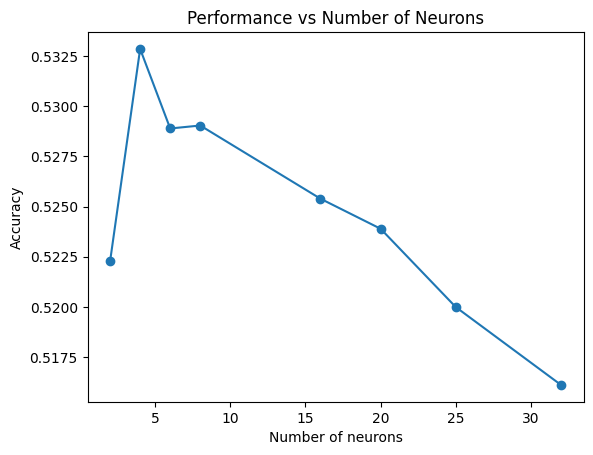

In [70]:
# Plot the performance vs number of neurons
import matplotlib.pyplot as plt

plt.plot(neurons_list, performance, 'o-')
plt.xlabel('Number of neurons')
plt.ylabel('Accuracy')
plt.title('Performance vs Number of Neurons')
plt.show()

In [ ]:
# Plot the performance vs number of neurons
import matplotlib.pyplot as plt

plt.plot(neurons_list, performance, 'o-')
plt.xlabel('Number of neurons')
plt.ylabel('Accuracy')
plt.title('Performance vs Number of Neurons')
plt.show()

In [32]:
#from scipy.sparse import csr_matrix

# Create a sparse matrix
#data = np.random.randint(0, 2, size=(10, 10))
#data[data == 0] = -1
#sparse_matrix = csr_matrix(data)

# Convert to dense matrix and then to tensor
#dense_matrix = sparse_matrix.toarray()
#tensor = tf.constant(dense_matrix)

# Check the result
#print(tensor)

In [ ]:
# Convert sparse matrices to dense matrices
#X_train_dense = X_train.toarray()
#X_val_dense = X_val.toarray()

# Create a tf.data.Dataset from your input data
#train_dataset = tf.data.Dataset.from_tensor_slices((X_train_dense, y_train))
#val_dataset = tf.data.Dataset.from_tensor_slices((X_val_dense, y_val))

# Define batch size and number of epochs
#batch_size = 32
#epochs = 10

# Fit the model using the dataset
#history = model.fit(train_dataset.batch(batch_size), epochs=epochs, validation_data=val_dataset.batch(batch_size))


In [51]:
y_val_one_hot.shape

(47461, 6)